<a href="https://colab.research.google.com/github/LiChiiiii/NLP_jieba/blob/master/nlp_hw01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install jieba
!pip install pandas 
!pip install matplotlib

前100個高頻字詞：
   word  frequency
0    八卦      79123
1    什麼      57987
2    台灣      35008
3    怎麼      33188
4    可以      23235
..  ...        ...
95   南部       2744
96   需要       2726
97   好像       2715
98   結果       2704
99   而已       2676

[100 rows x 2 columns]


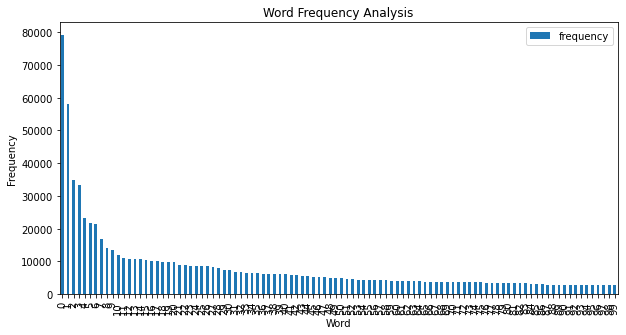

In [10]:
import jieba
import jieba.analyse
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

#中文分詞
def seg_data():
  cut_words=""
  jieba.enable_parallel(4)
  for line in open('hw1-dataset.txt',encoding='utf-8'):
      line.strip('\n')
      line = re.sub("[A-Za-z0-9\：\·\—\，\。\“ \”\?\？\...\..]", "", line) #刪掉多餘的符號
      seg_list=jieba.cut(line,cut_all=False)  #分詞
      cut_words+=(" ".join(seg_list))
  jieba.disable_parallel
  all_words=cut_words.split()
  return all_words

#統計詞頻
def counter(all_words): 
  arr = []
  c=Counter()
  for x in all_words:
      if len(x)>1 and x != '\r\n\t':
          c[x] += 1
  print('前100個高頻字詞：')
  for (k,v) in c.most_common(100): #前100個高頻字詞放到arr
      arr.append([k,v])
  return arr 

#權重(fig1)
def TF_IDF_figure():

#出現頻率圖(fig2)
def counter_figure(arr):
  df = pd.DataFrame(arr, columns = ["word", "frequency"]) 
  print(df) #印出表格
  chart = df.plot(  kind='bar',
                    title='Word Frequency Analysis',  #圖表標題
                    xlabel='Word',  #x軸說明文字
                    ylabel='Frequency',  #y軸說明文字
                    legend=True,  # 是否顯示圖例
                    figsize=(10, 5))  # 圖表大小
  plt.show()

#TF-IDF
def TF_IDF():
  content = open('hw1-dataset.txt', 'rb').read()
  jieba.enable_parallel(4)
  index = jieba.analyse.extract_tags(content,100,withWeight=True)
  for key,weight in index :
      print("index: %s\t\t weight: %f" % (key,weight))
  jieba.disable_parallel

#main
Text = seg_data()
array = counter(Text)
counter_figure(array)
# TF_IDF()

NameError: ignored